<a href="https://colab.research.google.com/github/CesarGarcia1995/labelectronicadigital/blob/main/Cesar_Garcia_Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors


### Ejemplo 1

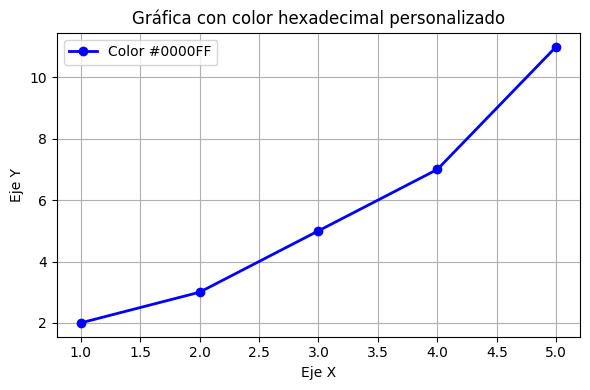

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors

# Ejemplo 1
# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Color personalizado en hexadecimal
hex_color = "#0000FF"  # Azul

# Crear gráfica
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', color=hex_color, linewidth=2, label=f"Color {hex_color}")
plt.title("Gráfica con color hexadecimal personalizado")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ejemplo 2

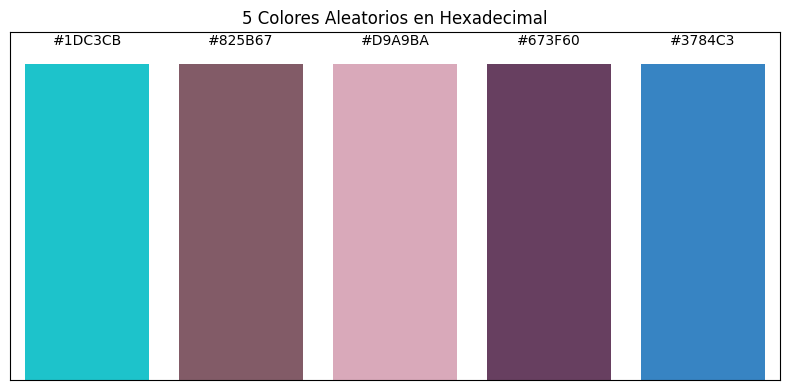

In [ ]:
import matplotlib.pyplot as plt
import random

def generate_random_hex_color():
    return "#{:06X}".format(random.randint(0, 0xFFFFFF))

# Generar 5 colores aleatorios
colors = [generate_random_hex_color() for _ in range(5)]

# Graficar como barras de colores
plt.figure(figsize=(8, 4))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)
    plt.text(i, 1.05, color, ha='center', va='bottom', fontsize=10)

plt.xticks([])
plt.yticks([])
plt.title("5 Colores Aleatorios en Hexadecimal")
plt.xlim(-0.5, 4.5)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

Ejemplo de uso de codificacion hexadecimal del color , se quiere representar la distribución de temperatura en una placa usando colores, internamente, matplotlib traduce cada valor numérico a un código RGB/hex para generar la imagen.

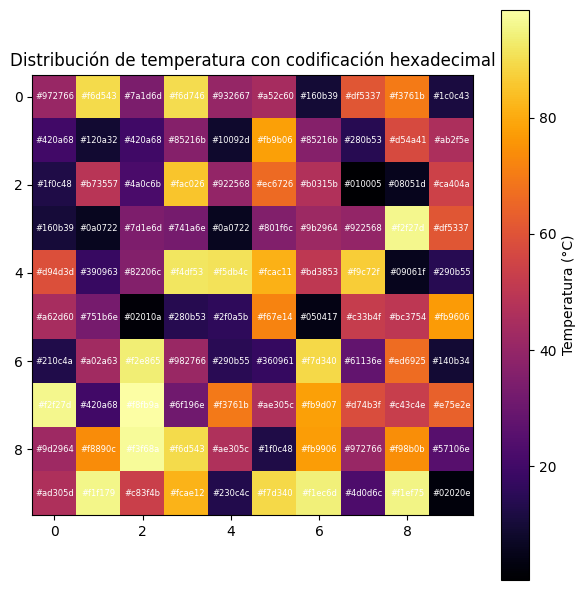

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_hex

# Crear matriz de temperatura (10x10) entre 0 y 100 °C
temperatura = np.random.rand(10, 10) * 100

# Usar colormap 'inferno' con la nueva forma
cmap = plt.get_cmap('inferno')  # ✅ Forma moderna sin warnings
norm = Normalize(vmin=0, vmax=100)

# Convertir temperaturas a colores hexadecimales
hex_colors = np.empty(temperatura.shape, dtype=object)
for i in range(temperatura.shape[0]):
    for j in range(temperatura.shape[1]):
        rgba = cmap(norm(temperatura[i, j]))
        hex_colors[i, j] = to_hex(rgba)

# Mostrar el mapa de calor
plt.figure(figsize=(6, 6))
plt.imshow(temperatura, cmap='inferno')
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de temperatura con codificación hexadecimal")

# Mostrar el código hexadecimal sobre cada celda
for i in range(temperatura.shape[0]):
    for j in range(temperatura.shape[1]):
        plt.text(j, i, hex_colors[i, j], fontsize=6, ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


## Tarea 1
Generar un mapa de color personalizado a partir de un color hexadecimal base

### Instrucciones:
1. Define un color base en formato hexadecimal, por ejemplo `#66ccff` (azul claro).
2. Genera con numpy una matriz de valores aleatorios entre 0 y 1 (por ejemplo de 10x10).
3. Completa la función `darken_color` , que cumpla las siguientes caracteristicas:
   - Reciba un valor entre 0 y 1.
   - Devuelva un color más oscuro que el color base, en función del valor recibido.
     * A mayor valor, más oscuro el color.
5. Aplica tu función a cada valor para obtener una matriz de colores personalizados.
6. Muestra la matriz de colores como una imagen (`imshow` de matplotlib), sin usar colormaps predefinidos.
7. Bonus: agrega una barra de color personalizada o una leyenda.

### Requisitos:
- Trabajar con el formato de color hexadecimal.
- No usar cmap de Matplotlib (se construye a mano).
- Usar `matplotlib.colors.to_rgb` y `matplotlib.colors.to_hex` puede ayudarte.


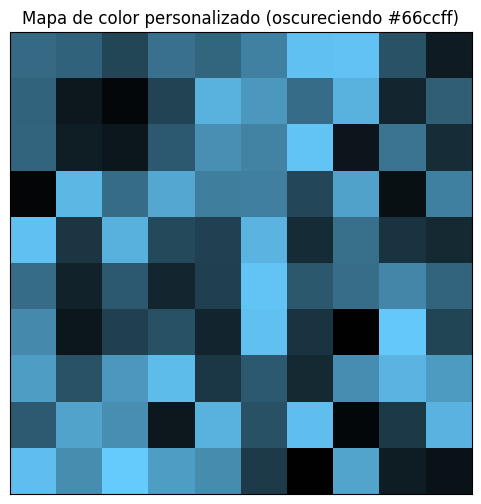

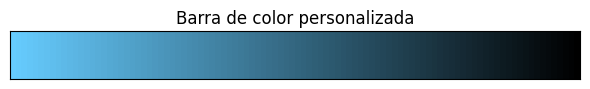

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Paso 1: color base en hexadecimal
base_hex = "#66ccff"  # Azul claro
base_rgb = np.array(mcolors.to_rgb(base_hex))  # Convertir a RGB (valores entre 0 y 1)

# Paso 2: generar matriz de valores aleatorios entre 0 y 1
valores = np.random.rand(10, 10)

# Paso 3: función para oscurecer color base
def darken_color(value):
    """
    Recibe un valor entre 0 y 1.
    Devuelve una versión más oscura del color base,
    siendo más oscura cuanto mayor sea el valor.
    """
    factor = 1 - value  # A mayor valor, menor brillo
    dark_rgb = base_rgb * factor
    return mcolors.to_hex(dark_rgb)

# Paso 4: aplicar función a cada valor para obtener matriz de colores hexadecimales
color_matrix = np.empty(valores.shape, dtype=object)
for i in range(valores.shape[0]):
    for j in range(valores.shape[1]):
        color_matrix[i, j] = darken_color(valores[i, j])

# Paso 5: mostrar la imagen usando imshow sin cmap
# Creamos una imagen RGB a partir de los hex
rgb_matrix = np.empty((10, 10, 3))
for i in range(10):
    for j in range(10):
        rgb_matrix[i, j] = mcolors.to_rgb(color_matrix[i, j])

plt.figure(figsize=(6, 6))
plt.imshow(rgb_matrix)
plt.title("Mapa de color personalizado (oscureciendo " + base_hex + ")")
plt.xticks([])
plt.yticks([])

# BONUS: barra de color personalizada
# Crear una barra horizontal con degradado del color base a oscuro
gradient = np.linspace(0, 1, 100).reshape(1, -1)  # 1x100
gradient_rgb = np.array([[mcolors.to_rgb(darken_color(v)) for v in np.linspace(0, 1, 100)]])

plt.figure(figsize=(6, 1))
plt.imshow(gradient_rgb, aspect='auto')
plt.title("Barra de color personalizada")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


Que hace la función `to_rgb`?

La función matplotlib.colors.to_rgb() convierte un color en formato hexadecimal (o nombre de color) a una tupla RGB normalizada, es decir, con valores entre 0 y 1.

In [ ]:
import numpy as np

# Paso 2: generar datos aleatorios entre 0 y 1
data = np.random.rand(10, 10)


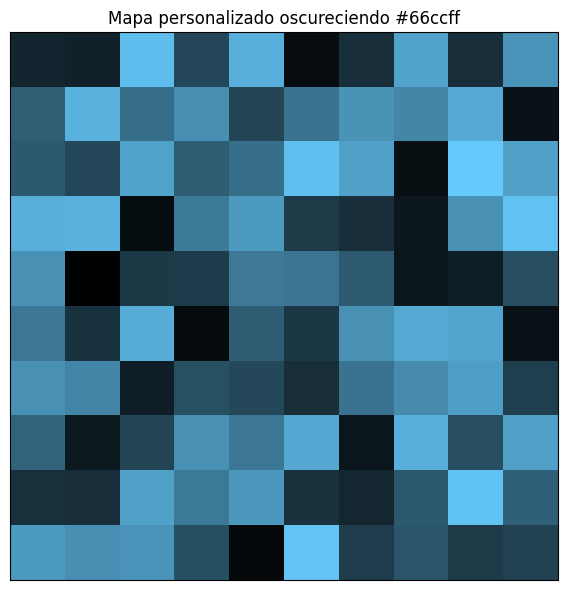

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Paso 1: color base en hexadecimal
base_hex = "#66ccff"  # Azul claro
base_rgb = np.array(mcolors.to_rgb(base_hex))  # Convertir a RGB (0 a 1)

# Paso 2: generar matriz aleatoria 10x10 con valores entre 0 y 1
data = np.random.rand(10, 10)

# Paso 3: función para oscurecer color base según valor [0,1]
def darken_color(value):
    factor = 1 - value  # A mayor valor, más oscuro
    dark_rgb = base_rgb * factor
    return mcolors.to_hex(dark_rgb)

# Paso 4: crear matriz de colores hex aplicando darken_color a cada valor
color_matrix = np.empty(data.shape, dtype=object)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        color_matrix[i, j] = darken_color(data[i, j])

# Paso 5: convertir matriz hex a RGB para matplotlib.imshow
rgb_matrix = np.empty((10, 10, 3))
for i in range(10):
    for j in range(10):
        rgb_matrix[i, j] = mcolors.to_rgb(color_matrix[i, j])

# Mostrar el mapa de color
plt.figure(figsize=(6, 6))
plt.imshow(rgb_matrix)
plt.title(f"Mapa personalizado oscureciendo {base_hex}")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


In [ ]:
def darken_color(value, base_color):
    """
    value: float entre 0 (sin cambio) y 1 (oscuro)
    base_color: array RGB (valores entre 0 y 1)
    """
    # Se multiplica el color base por (1 - value) para oscurecer
    darkened = base_color * (1 - value)
    # Asegurar que ningún valor sea menor que 0 (por si acaso)
    darkened = np.clip(darkened, 0, 1)
    return mcolors.to_hex(darkened)


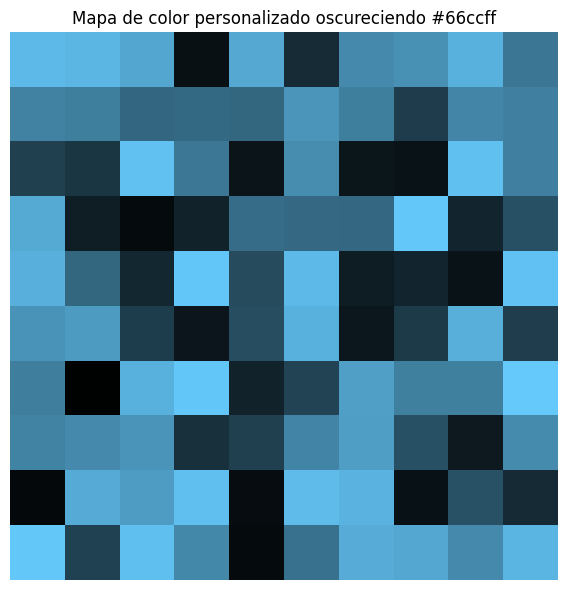

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Color base en hexadecimal y conversión a RGB
base_hex = "#66ccff"
base_rgb = np.array(mcolors.to_rgb(base_hex))

# Generar matriz 10x10 de valores aleatorios entre 0 y 1
data = np.random.rand(10, 10)

# Función que oscurece el color base según el valor (0 a 1)
def darken_color(value, base_color):
    factor = 1 - value  # Más valor → más oscuro
    darkened = base_color * factor
    darkened = np.clip(darkened, 0, 1)
    return mcolors.to_hex(darkened)

# Aplicar función a toda la matriz usando vectorize
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)

# Convertir matriz hex a matriz RGB para imshow
rgb_matrix = np.empty((10, 10, 3))
for i in range(10):
    for j in range(10):
        rgb_matrix[i, j] = mcolors.to_rgb(color_matrix[i, j])

# Mostrar imagen
plt.figure(figsize=(6,6))
plt.imshow(rgb_matrix)
plt.axis('off')
plt.title(f"Mapa de color personalizado oscureciendo {base_hex}")
plt.tight_layout()
plt.show()


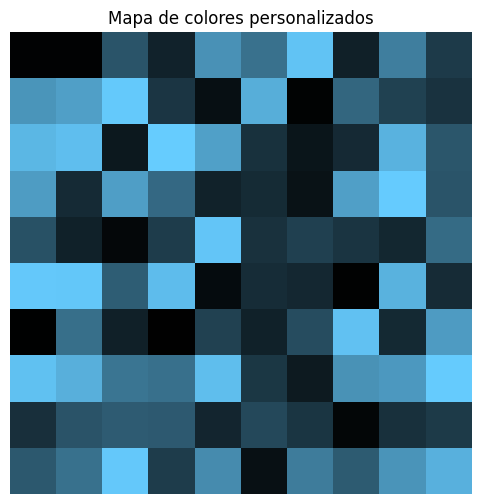

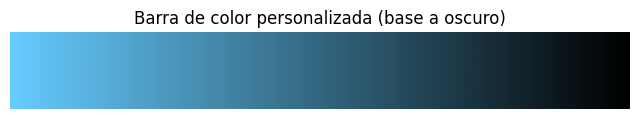

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Color base y conversión a RGB
base_hex = "#66ccff"
base_rgb = np.array(mcolors.to_rgb(base_hex))

# Matriz de datos aleatorios
data = np.random.rand(10, 10)

# Función para oscurecer color base
def darken_color(value, base_color):
    factor = 1 - value
    darkened = base_color * factor
    darkened = np.clip(darkened, 0, 1)
    return mcolors.to_hex(darkened)

# Generar matriz de colores hex
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)

# Convertir matriz hex a RGB
rgb_matrix = np.array([[mcolors.to_rgb(c) for c in row] for row in color_matrix])

# Mostrar mapa de colores personalizado
plt.figure(figsize=(6, 6))
plt.imshow(rgb_matrix)
plt.axis('off')
plt.title("Mapa de colores personalizados")

# Crear barra de color personalizada (degradado de color base a negro)
gradient = np.linspace(0, 1, 256)  # 256 pasos del gradiente
gradient_colors = [mcolors.to_rgb(darken_color(v, base_rgb)) for v in gradient]
gradient_rgb = np.array([gradient_colors])  # 1x256x3

# Mostrar barra de color
plt.figure(figsize=(8, 1))
plt.imshow(gradient_rgb, aspect='auto')
plt.axis('off')
plt.title("Barra de color personalizada (base a oscuro)")

plt.show()


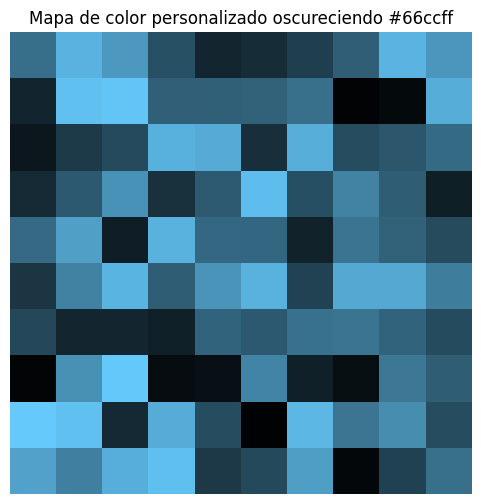

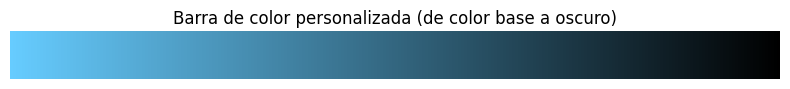

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Paso 1: definir color base en hexadecimal y convertir a RGB
base_hex = "#66ccff"  # azul claro
base_rgb = np.array(mcolors.to_rgb(base_hex))

# Paso 2: generar matriz de valores aleatorios entre 0 y 1 (10x10)
data = np.random.rand(10, 10)

# Paso 3: función para oscurecer el color base según valor [0,1]
def darken_color(value, base_color):
    """
    value: float entre 0 (sin cambio) y 1 (oscuro)
    base_color: array RGB (valores entre 0 y 1)
    """
    factor = 1 - value  # a mayor valor, más oscuro (factor entre 1 y 0)
    darkened = base_color * factor
    darkened = np.clip(darkened, 0, 1)  # asegurar rango válido
    return mcolors.to_hex(darkened)

# Paso 4: aplicar función a cada elemento de la matriz para obtener colores hexadecimales
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)

# Paso 5: convertir matriz de colores hexadecimales a matriz RGB para matplotlib
rgb_matrix = np.array([[mcolors.to_rgb(c) for c in row] for row in color_matrix])

# Paso 6: mostrar la imagen con imshow sin usar cmap
plt.figure(figsize=(6, 6))
plt.imshow(rgb_matrix)
plt.axis('off')
plt.title(f"Mapa de color personalizado oscureciendo {base_hex}")

# Bonus: crear barra de color personalizada (degradado del color base a negro)
gradient = np.linspace(0, 1, 256)
gradient_colors = [mcolors.to_rgb(darken_color(v, base_rgb)) for v in gradient]
gradient_rgb = np.array([gradient_colors])

plt.figure(figsize=(8, 1))
plt.imshow(gradient_rgb, aspect='auto')
plt.axis('off')
plt.title("Barra de color personalizada (de color base a oscuro)")

plt.tight_layout()
plt.show()
